In [129]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)
plt.style.use('classic')

In [130]:
data = pd.read_csv('xclara.csv')
print(data.shape)
data.head()

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


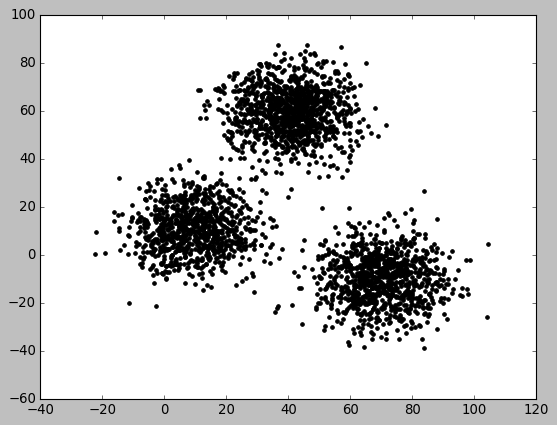

In [131]:
# Getting the values 
f1 = data['V1'].values
f2 = data['V2'].values
#Getting the values in co-ordinates in X (X[0] = (f1[0],f2[0]))
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=10)

In [132]:
#Euclidean distance calculator
def dist(x, y, ax=1):
    return np.linalg.norm(x - y, axis=ax)

In [133]:
k = 3
# choosing random co-ordinates for the centroid
C_x = np.random.randint(0, np.max(X)-5, size=k)
C_y = np.random.randint(0, np.max(X)-5, size=k)
#list of coordinates of k-centroids
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)

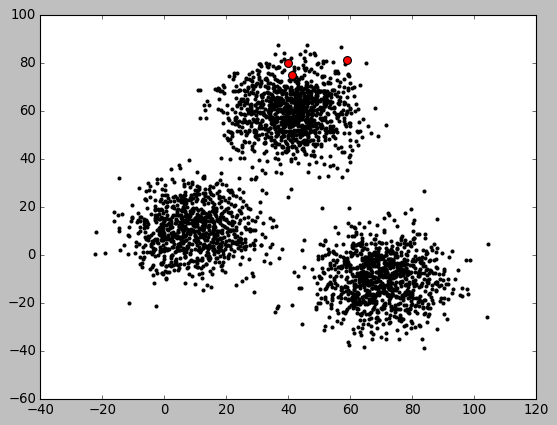

In [135]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='black', s=7)
plt.scatter(C_x, C_y, marker='.', s=200, c='r')

In [136]:
# To store the value of centroids when it updates
C_new = np.zeros(C.shape)
# to denote which cluster that particular point belongs to
clusters = np.zeros(len(X))
# Error func. - Distance between old centroids and updated centroids
error = dist(C, C_new, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each point to the cluster where the distance is least 
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_new = deepcopy(C)
    # Finding the new centroids for a previously assigned cluster by aking the mean of the points in the cluster
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    # Calculating the new error by calculating the distance between the old and new centroids     
    error = dist(C, C_new, None)

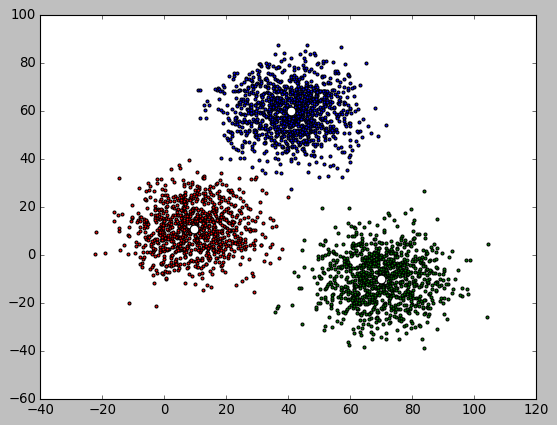

In [137]:
colors = ['r', 'g', 'b']
#plotting the clustered points with the final centroid
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='.', s=250, c='white')